# Optimised Deep Neural Network model to Predict Asthma Exacerbation based on Personalised Weather Triggers

In [50]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [51]:
# read the csv file 

Data = pd.read_csv('AsthmaFiles/210526WeAdatasetRegression.csv')


# Exploratory Data Analysis

In [52]:
# show the dataset

Data

,UserNo.,UserID,Location,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,100,1011,23.9,Low,6.7,14
1,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,94,1010,25.0,Low,0.8,15
2,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,88,1008,23.9,Extreme,3.1,15
3,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,94,1009,22.7,Low,1.1,13
4,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,83,1008,24.9,Low,5.1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,Kuala Lampur,31-40,Male,Rarely,Not at all likely,No,94,1010,27.0,Low,1.3,18
1006,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,Kuala Lampur,31-40,Male,Rarely,Not at all likely,No,78,1011,25.4,Low,1.0,18
1007,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,Kuala Lampur,31-40,Male,Rarely,Not at all likely,No,83,1010,25.6,Low,1.0,19
1008,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,Kuala Lampur,31-40,Male,Rarely,Not at all likely,No,89,1008,29.7,Extreme,0.9,17


In [53]:
# get some information about the dataset

Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UserNo.            1010 non-null   int64  
 1   UserID             1010 non-null   object 
 2   Location           1010 non-null   object 
 3   Age                1010 non-null   object 
 4   Gender             1010 non-null   object 
 5   OutdoorJob         1010 non-null   object 
 6   OutdoorActivities  1010 non-null   object 
 7   SmokingHabit       1010 non-null   object 
 8   Humidity           1010 non-null   int64  
 9   Pressure           1010 non-null   int64  
 10  Temperature        1010 non-null   float64
 11  UVIndex            1010 non-null   object 
 12  WindSpeed          1010 non-null   float64
 13  ACTScore           1010 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 110.6+ KB


,count,mean,std,min,25%,50%,75%,max
UserNo.,1010.0,3.932673,2.542293,1.0,3.00,3.0,6.0,10.0
Humidity,1010.0,81.748515,13.542801,40.0,70.00,87.0,93.0,100.0
Pressure,1010.0,1009.264356,2.114750,1003.0,1008.00,1009.0,1011.0,1014.0
Temperature,1010.0,27.610990,2.915736,21.1,25.20,27.5,30.1,34.5
WindSpeed,1010.0,2.373069,1.569837,0.0,1.00,2.1,3.3,6.7
ACTScore,1010.0,16.576238,4.666969,8.0,12.25,17.0,21.0,25.0


In [54]:
# check if there are any Null values

Data.isnull().sum()

UserNo.              0
UserID               0
Location             0
Age                  0
Gender               0
OutdoorJob           0
OutdoorActivities    0
SmokingHabit         0
Humidity             0
Pressure             0
Temperature          0
UVIndex              0
WindSpeed            0
ACTScore             0
dtype: int64

In [55]:
# convert categorical data

from sklearn.preprocessing import LabelEncoder

Data['Location'] = LabelEncoder().fit_transform(Data.Location)
Data['Age'] = LabelEncoder().fit_transform(Data.Age)
Data['Gender'] = LabelEncoder().fit_transform(Data.Gender)
Data['OutdoorJob'] = LabelEncoder().fit_transform(Data.OutdoorJob)
Data['OutdoorActivities'] = LabelEncoder().fit_transform(Data.OutdoorActivities)
Data['UVIndex'] = LabelEncoder().fit_transform(Data.UVIndex)

Data

,UserNo.,UserID,Location,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,4,3,1,1,0,No,100,1011,23.9,1,6.7,14
1,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,4,3,1,1,0,No,94,1010,25.0,1,0.8,15
2,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,4,3,1,1,0,No,88,1008,23.9,0,3.1,15
3,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,4,3,1,1,0,No,94,1009,22.7,1,1.1,13
4,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,4,3,1,1,0,No,83,1008,24.9,1,5.1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,3,1,1,2,2,No,94,1010,27.0,1,1.3,18
1006,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,3,1,1,2,2,No,78,1011,25.4,1,1.0,18
1007,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,3,1,1,2,2,No,83,1010,25.6,1,1.0,19
1008,10,b53sAlbpdKesHxsTCiTRPL9SmGx2,3,1,1,2,2,No,89,1008,29.7,0,0.9,17


In [56]:
# drop unnecessary data

data = Data.drop(['UserNo.', 'UserID'],axis =1)

data

,Location,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,4,3,1,1,0,No,100,1011,23.9,1,6.7,14
1,4,3,1,1,0,No,94,1010,25.0,1,0.8,15
2,4,3,1,1,0,No,88,1008,23.9,0,3.1,15
3,4,3,1,1,0,No,94,1009,22.7,1,1.1,13
4,4,3,1,1,0,No,83,1008,24.9,1,5.1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,3,1,1,2,2,No,94,1010,27.0,1,1.3,18
1006,3,1,1,2,2,No,78,1011,25.4,1,1.0,18
1007,3,1,1,2,2,No,83,1010,25.6,1,1.0,19
1008,3,1,1,2,2,No,89,1008,29.7,0,0.9,17


In [57]:
# describe output variable

data['ACTScore'].describe()

count    1010.000000
mean       16.576238
std         4.666969
min         8.000000
25%        12.250000
50%        17.000000
75%        21.000000
max        25.000000
Name: ACTScore, dtype: float64

/var/folders/78/0k0l12sj7tv881mzy3q878_r0000gn/T/ipykernel_94598/2516627335.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ACTScore'])


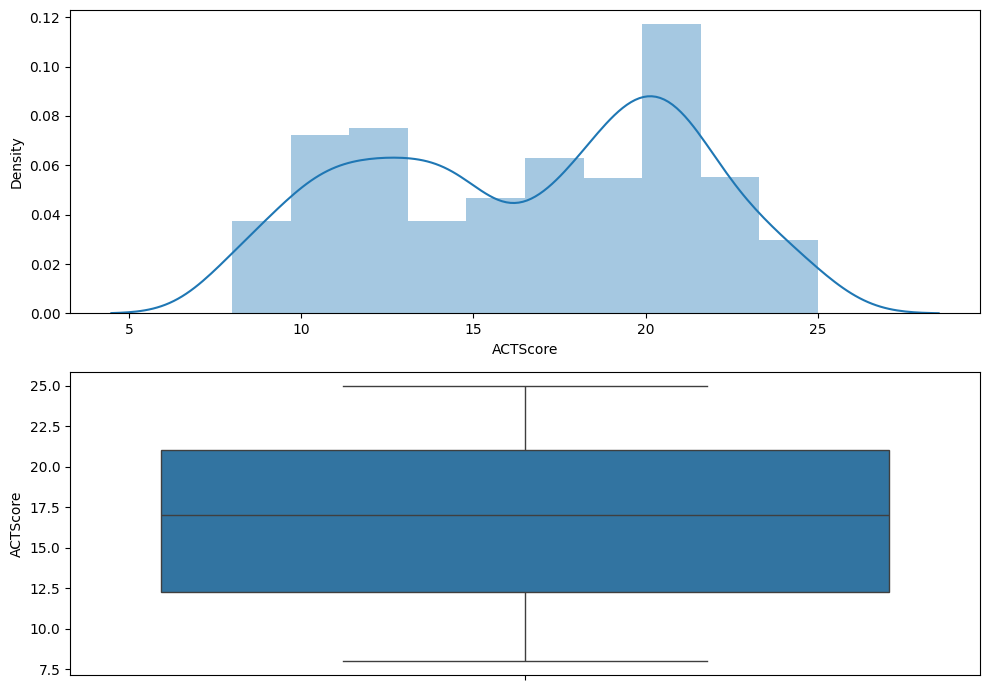

In [58]:
# visualise output variable

fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['ACTScore'])
fig.add_subplot(2,1,2)
sns.boxplot(data['ACTScore'])
plt.tight_layout()

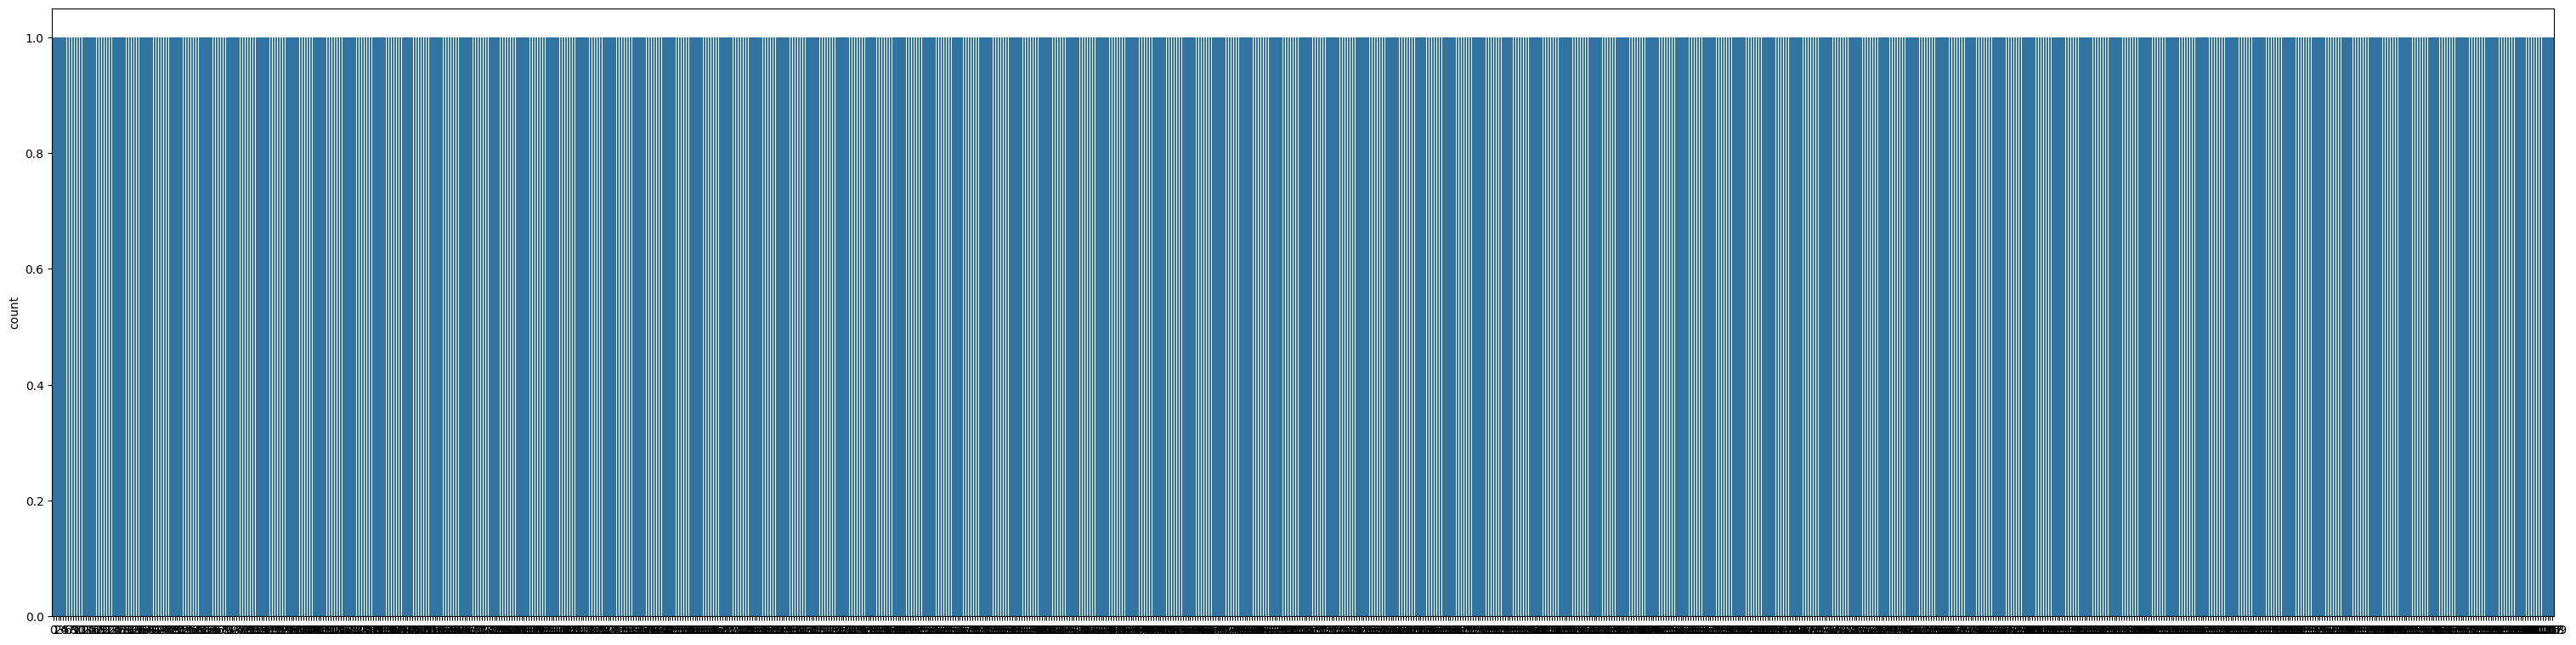

In [59]:
# visualise Temperature

fig = plt.figure(figsize=(60,15),constrained_layout=False)
fig.add_subplot(2,2,1)
sns.countplot(data['Temperature'])

plt.tight_layout()


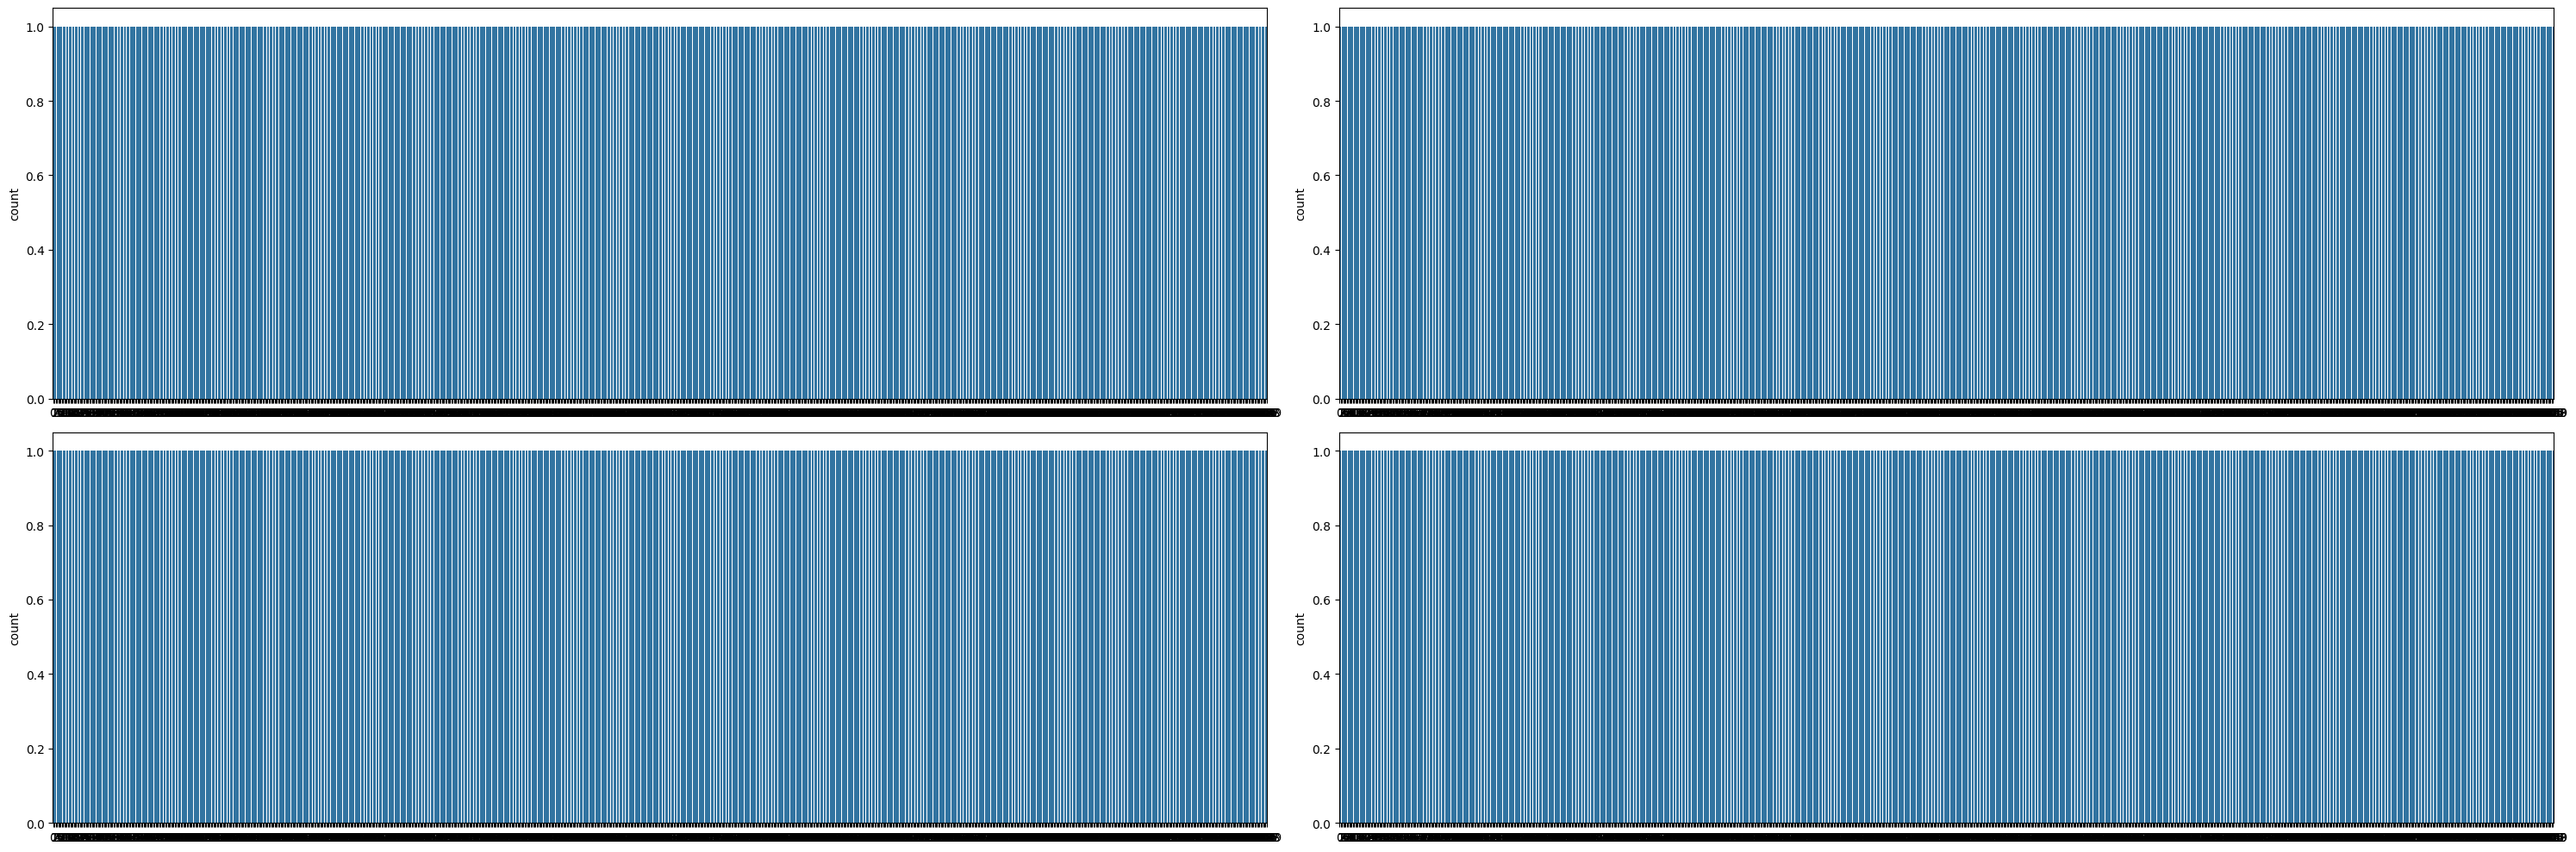

In [60]:
# visualise Humidity, Pressure, WindSpeed, UVIndex

fig = plt.figure(figsize=(30,10),constrained_layout=False)
fig.add_subplot(2,2,1)
sns.countplot(data['Humidity'])
fig.add_subplot(2,2,2)
sns.countplot(data['WindSpeed'])
fig.add_subplot(2,2,3)
sns.countplot(data['Pressure'])
fig.add_subplot(2,2,4)
sns.countplot(data['UVIndex'])

plt.tight_layout()


In [61]:
# check correlation

# data.corr()['ACTScore'].sort_values(ascending=False)

In [62]:
# show correlation metrix (heatmap)

# corrmat = data.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

In [63]:

# k = 12 # number of variables for the heatmap
# cols = corrmat.nlargest(k, 'ACTScore')['ACTScore'].index
# f, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(data[cols].corr(), vmax=.8, square=True, annot=True );

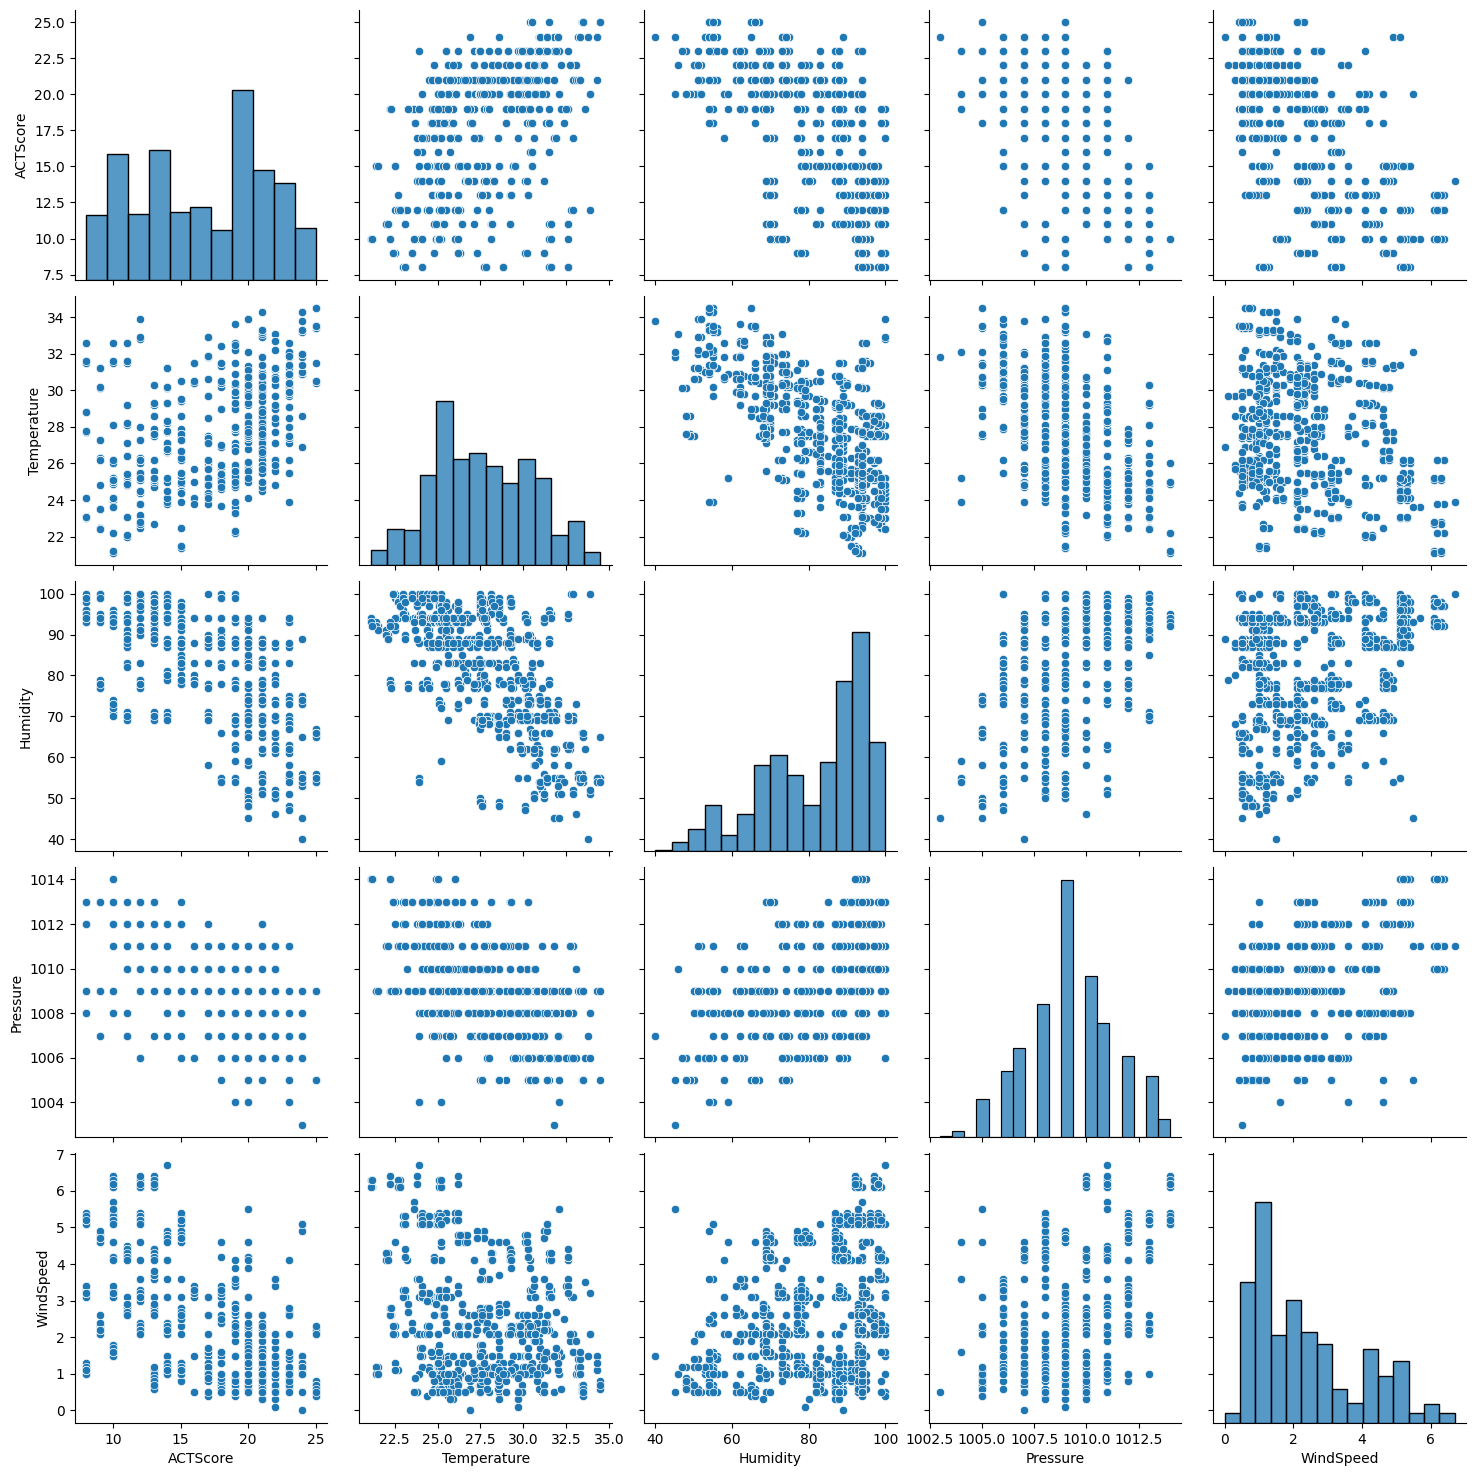

In [64]:
# visualise Temperature, Humidity, Pressure, WindSpeed

cols = ['ACTScore', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed']
sns.pairplot(data[cols], height = 3);

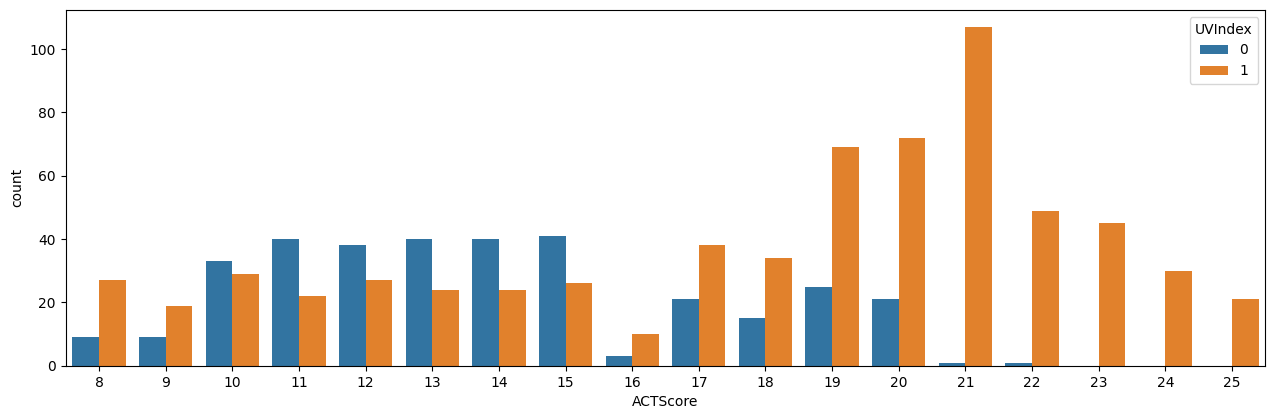

In [65]:
# visualise UVIndex

fig = plt.figure(figsize=(25,8),constrained_layout=False)
fig.add_subplot(2,2,1)
sns.countplot(x="ACTScore", hue="UVIndex", data=Data)

plt.tight_layout()


# Splitting the Dataset


In [66]:
# define X as input features and Y as target variable 
X = data.drop(['SmokingHabit', 'ACTScore'],axis =1).values
Y = data['ACTScore'].values


In [67]:
# split Train and Test 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test = s_scaler.transform(X_test.astype(float))

# Deep Neural Network Regression (DNNR)

In [69]:
# create a DNNR model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [70]:
# add layers

model1 = Sequential()

model1.add(Dense(16, input_dim=10, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mean_squared_error')

In [71]:
# train the model

model1.fit(x=X_train,y=Y_train,
          validation_data=(X_test,Y_test),
          batch_size=128,epochs=1000)

Epoch 1/1000
6/6 [==============================] - 0s 43ms/step - loss: 295.7565 - val_loss: 282.0294
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 293.1782 - val_loss: 279.4854
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 290.3502 - val_loss: 276.9193
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 287.6165 - val_loss: 274.2227
Epoch 5/1000
6/6 [==============================] - 0s 11ms/step - loss: 284.5819 - val_loss: 271.5125
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 281.6335 - val_loss: 268.6689
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 278.4053 - val_loss: 265.7588
Epoch 8/1000
6/6 [==============================] - 0s 11ms/step - loss: 275.1832 - val_loss: 262.7330
Epoch 9/1000
6/6 [==============================] - 0s 11ms/step - loss: 271.7307 - val_loss: 259.6566
Epoch 10/1000
6/6 [==============================] - 0s 11ms/step - loss:

In [72]:
model1.summary()

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_261 (Dense)           (None, 16)                176       
                                                                 
 dense_262 (Dense)           (None, 16)                272       
                                                                 
 dense_263 (Dense)           (None, 1)                 17        
                                                                 
Total params: 465 (1.82 KB)
Trainable params: 465 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

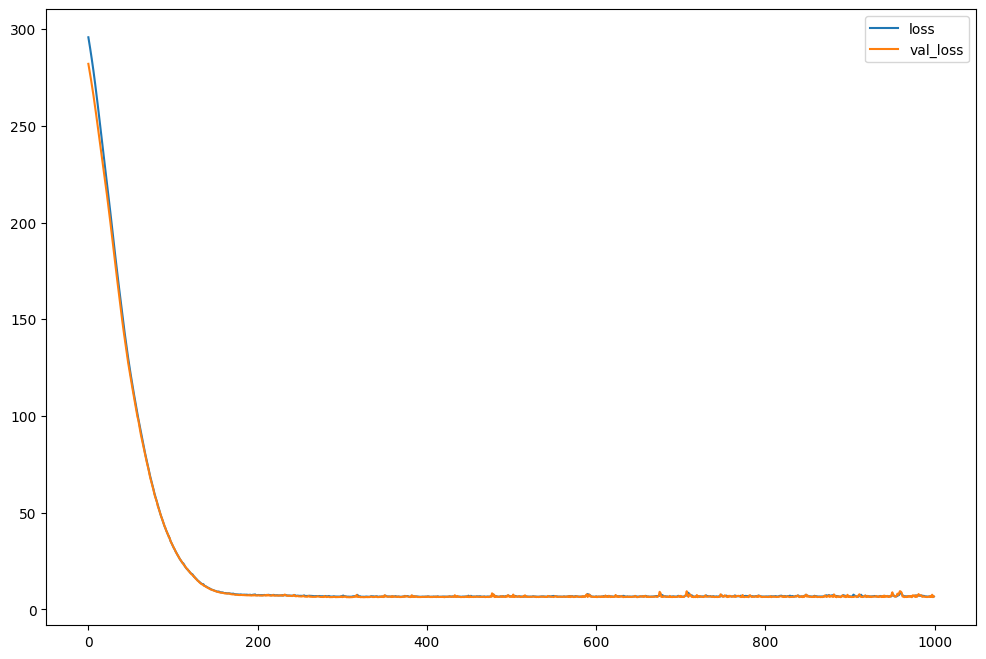

In [73]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.plot(figsize=(12,8))


In [74]:
# show evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse

from sklearn import metrics

Y_pred1 = model1.predict(X_test)

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(Y_test, Y_pred1)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(Y_test, Y_pred1)))
print('Explained Variance Score: {:.2f}'.format(metrics.explained_variance_score(Y_test, Y_pred1)))

10/10 [==============================] - 0s 3ms/step
Mean Absolute Error: 2.00
Mean Squared Error: 6.74
Explained Variance Score: 0.69


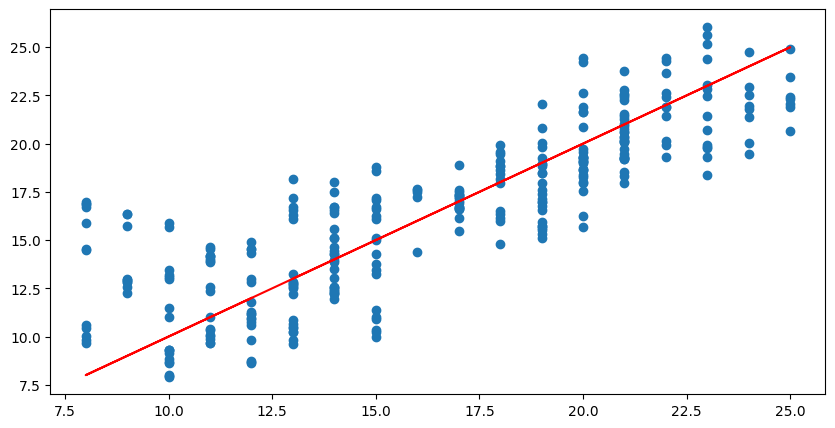

In [75]:
# show prediction result
fig = plt.figure(figsize = (10,5))
plt.scatter(Y_test,Y_pred1)
plt.plot(Y_test,Y_test,'r')

/var/folders/78/0k0l12sj7tv881mzy3q878_r0000gn/T/ipykernel_94598/1870692961.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals1)


<Axes: ylabel='Density'>

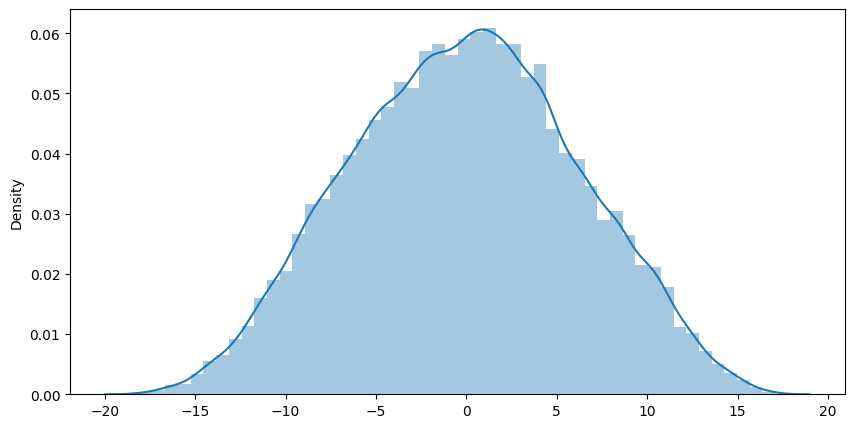

In [76]:
fig2 = plt.figure(figsize=(10,5))
residuals1 = (Y_test- Y_pred1)
sns.distplot(residuals1)

In [77]:
Y_test

array([13, 16, 25, 19, 20, 12, 10, 20, 24, 21, 12, 23, 21, 24, 22, 17, 23,
       13, 13, 21, 13, 11, 10, 22, 13, 11, 17,  8, 11, 15, 18, 10, 22, 19,
       17, 21, 14, 18, 15, 19, 15, 12, 20, 24, 10, 10,  8, 10, 19, 20, 20,
       24, 21, 15, 18, 17, 13, 21, 10, 13, 21,  8, 10, 14, 14, 16, 13, 19,
       17, 19, 22, 14, 10, 18, 23, 21, 21, 13, 14, 14, 14, 11, 21, 10, 20,
        9, 12,  8, 11, 15, 19,  9, 14, 13, 12, 13, 16, 21, 20, 21, 12, 18,
       14, 19, 24, 11,  8, 19, 21, 19, 20,  9, 11, 20, 14, 20, 19, 10, 12,
       11, 21, 20, 21, 19, 11, 10, 17, 19, 25, 21, 20, 21, 25, 15, 18, 17,
       21, 21, 25, 14, 22, 21, 21, 12, 21, 15, 19, 19, 11, 17, 20, 16, 13,
       20, 12, 18, 19, 15,  9, 21, 23, 20, 24, 24, 14, 18, 20,  8, 23, 14,
       20, 12, 17, 15, 23, 13, 18, 13,  8, 15,  9,  9, 10, 15, 14,  8, 12,
       20, 16, 12, 20, 14, 20, 14, 19, 14, 18, 11, 18, 17, 15, 23, 14, 10,
       11, 10, 20, 14, 19, 23, 22, 21, 21, 23, 13, 11, 17, 11, 19, 25, 10,
       12,  8,  8, 17, 22

In [78]:
Y_pred1

array([[ 9.639551 ],
       [17.580309 ],
       [22.035753 ],
       [15.714037 ],
       [21.630907 ],
       [14.52817  ],
       [ 9.122789 ],
       [18.651033 ],
       [21.931387 ],
       [19.28641  ],
       [11.275545 ],
       [19.779772 ],
       [20.585726 ],
       [22.544405 ],
       [21.875185 ],
       [16.126024 ],
       [23.04484  ],
       [16.110155 ],
       [10.647066 ],
       [22.77527  ],
       [17.17512  ],
       [11.000521 ],
       [11.499071 ],
       [21.880983 ],
       [ 9.836618 ],
       [10.07432  ],
       [18.87047  ],
       [10.051622 ],
       [14.656572 ],
       [16.245646 ],
       [17.964983 ],
       [ 8.031145 ],
       [23.654879 ],
       [18.928362 ],
       [15.47072  ],
       [19.479769 ],
       [13.036196 ],
       [18.428911 ],
       [18.77672  ],
       [22.04474  ],
       [15.1142435],
       [12.827337 ],
       [21.638811 ],
       [24.732744 ],
       [ 8.821199 ],
       [13.434946 ],
       [16.741838 ],
       [13.17

# DNNR Model Optimisation

### Data scaling

In [79]:
# apply data standardisation

from sklearn.preprocessing import StandardScaler

TargetVariable =['ACTScore']
Predictors =['Location', 'Age', 'Gender', 'Humidity', 'Pressure', 'Temperature', 'UVIndex', 'WindSpeed', 'OutdoorJob', 'OutdoorActivities']

X = data[Predictors].values
Y = data[TargetVariable].values

PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

# store the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
TargetVarScalerFit = TargetVarScaler.fit(Y)

# generate the standardised values of X and Y
X = PredictorScalerFit.transform(X)
Y = TargetVarScalerFit.transform(Y)

# split Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# check the shapes of training and testing datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(707, 10)
(707, 1)
(303, 10)
(303, 1)


### Optimisation algorithm

#### Hidden layers and hidden nodes

In [80]:
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
    
def FindLayerNodes(n_layers, n_layer_nodes):
    layers = []
    nodes = n_layer_nodes
    return layers

def createmodel(n_layers, n_layer_nodes):
    model = Sequential()
    n_nodes = FindLayerNodes(n_layers, n_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(n_layer_nodes, input_dim=10, activation='relu'))
        else:
            model.add(Dense(n_nodes[i], activation='relu'))
            
    model.add(Dense(1,))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model =  KerasRegressor(n_layers=[2,3,4],n_layer_nodes=[10,20,30,50],build_fn=createmodel, verbose=0)  

In [81]:
import time

# starting time
start = time.time()

# find the optimum number of hidden layers and hidden nodes
param_grid1 = dict(n_layers=[2, 3, 4], n_layer_nodes = [10, 20, 30, 50])
grid1 = GridSearchCV(estimator = model, param_grid = param_grid1)
grid1.fit(X,Y)

# summarise results
print('Best score: %s' % grid1.best_score_)
print('Best parameters: %s' % grid1.best_params_)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')


/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which

Best score: 0.3217646192017776
Best parameters: {'n_layer_nodes': 50, 'n_layers': 2}
Total time taken: 11.632044792175293


#### Bach size and epochs

In [82]:
# starting time
start = time.time()

# find the optimum bacth size
param_grid2 = dict(n_layers=[2], n_layer_nodes = [50], batch_size = [10,20])
grid2 = GridSearchCV(estimator = model, param_grid = param_grid2)
grid2.fit(X,Y)

# summarise results
print('Best score: %s' % grid2.best_score_)
print('Best parameters: %s' % grid2.best_params_)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')

/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which

Best score: 0.5271081938680957
Best parameters: {'batch_size': 10, 'n_layer_nodes': 50, 'n_layers': 2}
Total time taken: 8.12468409538269


In [83]:
# starting time
start = time.time()

# find the optimum number of epochs
param_grid2 = dict(n_layers=[2], n_layer_nodes = [50], batch_size = [10], epochs = [100,200])
grid2 = GridSearchCV(estimator = model, param_grid = param_grid2)
grid2.fit(X,Y)

# summarise results
print('Best score: %s' % grid2.best_score_)
print('Best parameters: %s' % grid2.best_params_)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')

/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which

KeyboardInterrupt: 

#### Optimiser

In [84]:
# starting time
start = time.time()

# find the optimiser
from sklearn.metrics import make_scorer

def make_regression_dnnr(Optimizer_trial):
        
    model = Sequential()
    model.add(Dense(units=50, input_dim=10, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(1,))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

param_grid3 = {'Optimizer_trial':['sgd', 'adam', 'rmsprop']}

model = KerasRegressor(make_regression_dnnr, verbose=False,Optimizer_trial="sgd")

# create the GridSearchCV
grid3 = GridSearchCV(estimator=model, param_grid = param_grid3)

# apply GridSearchCV for paramenters
grid3.fit(X,Y, verbose=0)

# summarise results
print('Best score: %s' % grid3.best_score_)
print('Best optimiser: %s' % grid3.best_params_)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')

Best score: 0.5513295877969467
Best optimiser: {'Optimizer_trial': 'rmsprop'}
Total time taken: 13.166515111923218


#### Loss function

In [85]:
# starting time
start = time.time()

# find the loss function 
from sklearn.metrics import make_scorer

def make_regression_dnnr(Loss_function):
        
    model = Sequential()
    model.add(Dense(units=50, input_dim=10, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(1,))
    model.compile(loss=Loss_function, optimizer='adam')
    return model

param_grid4 = {'Loss_function':['mae', 'mse', 'mape']}

model = KerasRegressor(make_regression_dnnr, verbose=False,Loss_function='mae')

# create the GridSearchCV
grid4 = GridSearchCV(estimator=model, param_grid = param_grid4)

# apply GridSearchCV for paramenters
grid4.fit(X,Y, verbose=0)

# summarise results
print('Best score: %s' % grid4.best_score_)
print('Best loss function: %s' % grid4.best_params_)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')

Best score: 0.557398091296258
Best loss function: {'Loss_function': 'mape'}
Total time taken: 10.907380104064941


#### Weight initialiser

In [86]:
# starting time
start = time.time()

# find the optimum weight initialiser
def create_model(init_mode):
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(50, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0,init_mode='uniform')

# define the grid search parameters
init_mode = ['uniform', 'normal']
param_grid5 = dict(init_mode=init_mode)
grid5 = GridSearchCV(estimator=model, param_grid =param_grid5)
grid5.fit(X, Y)

# summarise results
print('Best score: %s' % grid5.best_score_)
print('Best initialiser: %s' % grid5.best_params_)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')

/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/nkumar/Desktop/BreatheEasy/virtualenv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KeyboardInterrupt: 

# Optimised DNNR

In [87]:
# define the optimised model

model2 = Sequential()

model2.add(Dense(units=50, input_dim=10, kernel_initializer='normal', activation='relu'))
model2.add(Dense(units=50, kernel_initializer='normal', activation='relu'))

model2.add(Dense(1, kernel_initializer='normal'))


In [88]:
# apply optimiser

model2.compile(loss='mean_squared_error', optimizer='adam')



In [89]:
# starting time
import time
start = time.time()

model2.fit(x=X_train,y=Y_train,
          validation_data=(X_test,Y_test),
          batch_size=10,epochs=100)

# calculate time
end = time.time()
print(f'Total time taken: {end - start}')

Epoch 1/100
71/71 [==============================] - 1s 11ms/step - loss: 0.5421 - val_loss: 0.3130
Epoch 2/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3115 - val_loss: 0.2963
Epoch 3/100
71/71 [==============================] - 1s 8ms/step - loss: 0.3091 - val_loss: 0.2931
Epoch 4/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3059 - val_loss: 0.3001
Epoch 5/100
71/71 [==============================] - 0s 7ms/step - loss: 0.3113 - val_loss: 0.2929
Epoch 6/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3088 - val_loss: 0.3027
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 0.3089 - val_loss: 0.2900
Epoch 8/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3102 - val_loss: 0.2990
Epoch 9/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3094 - val_loss: 0.2902
Epoch 10/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3074 - val_loss: 0.2960
Epoch 11

In [90]:
model2.summary()

Model: "sequential_243"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_487 (Dense)           (None, 50)                550       
                                                                 
 dense_488 (Dense)           (None, 50)                2550      
                                                                 
 dense_489 (Dense)           (None, 1)                 51        
                                                                 
Total params: 3151 (12.31 KB)
Trainable params: 3151 (12.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

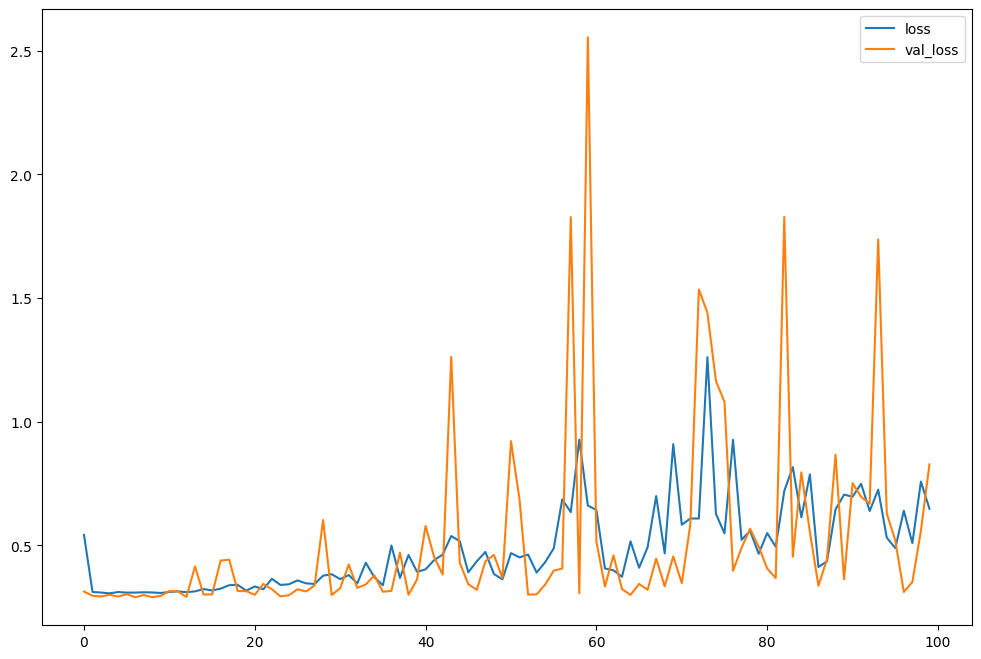

In [91]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot(figsize=(12,8))


In [92]:
Y_pred2 = model2.predict(X_test)
X_test

10/10 [==============================] - 0s 3ms/step


array([[-1.14715719, -0.69796586, -0.78815468, ...,  1.29181244,
        -1.85357435, -0.37089321],
       [ 0.87959866, -0.69796586, -0.78815468, ...,  0.59075557,
         0.17471394, -0.37089321],
       [-1.14715719, -0.69796586, -0.78815468, ..., -1.13002037,
        -1.85357435, -0.37089321],
       ...,
       [ 0.20401338,  1.71073182,  1.26878648, ...,  1.10061511,
         0.17471394, -0.37089321],
       [ 0.20401338,  1.71073182,  1.26878648, ...,  0.14462847,
         0.17471394, -0.37089321],
       [ 0.87959866, -0.69796586, -0.78815468, ...,  1.86540442,
         0.17471394, -0.37089321]])

In [93]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(Y_test, Y_pred2)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(Y_test, Y_pred2)))
print('Explained Variance Score: {:.2f}'.format(metrics.explained_variance_score(Y_test,Y_pred2)))


Mean Absolute Error: 0.72
Mean Squared Error: 0.83
Explained Variance Score: 0.17


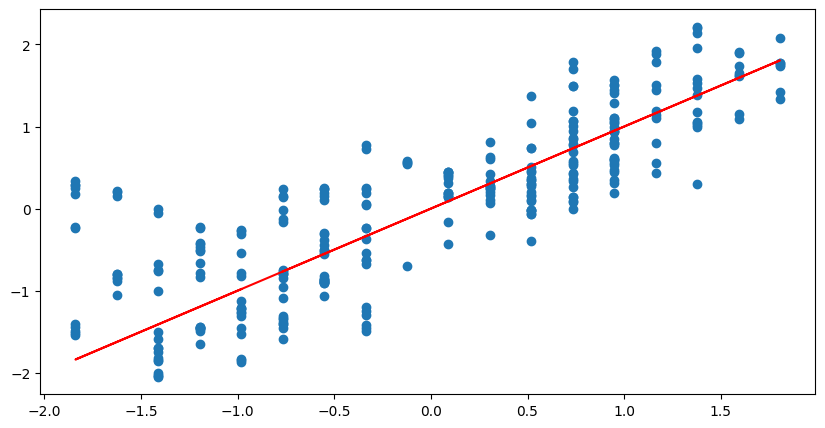

In [ ]:
# show prediction result
fig3 = plt.figure(figsize = (10,5))
plt.scatter(Y_test,Y_pred2)
plt.plot(Y_test,Y_test,'r')

/var/folders/78/0k0l12sj7tv881mzy3q878_r0000gn/T/ipykernel_94598/2408565348.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals2)


<Axes: ylabel='Density'>

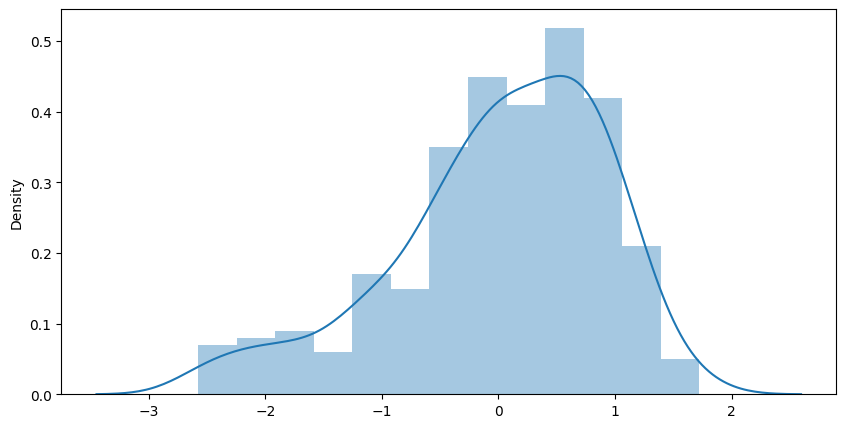

In [94]:
# show residuals
fig4 = plt.figure(figsize = (10,5))
residuals2 = (Y_test - Y_pred2)
sns.distplot(residuals2)

In [95]:
# generate predictions on testing set
Predictions = model2.predict(X_test)
 
# scale the predicted ACTScore back to original ACTScore scale
Predictions = TargetVarScalerFit.inverse_transform(Predictions)
 
# scale the Y_test ACTScore data back to original ACTScore scale
Y_test_orig = TargetVarScalerFit.inverse_transform(Y_test)
 
# scale the test data back to original scale
Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
TestingData = pd.DataFrame(data = Test_Data, columns = Predictors)
TestingData['ACTScore'] = Y_test_orig
TestingData['PredictedACTScore'] = Predictions

10/10 [==============================] - 0s 2ms/step


In [96]:
# compute the total accuracy from absolute error
Absolute_Error = 100 * (abs(TestingData['ACTScore'] - TestingData['PredictedACTScore']) / TestingData['ACTScore'])
TestingData['APE'] = Absolute_Error

print('The Accuracy of the optimised DNNR model is:', 100-np.mean(Absolute_Error))

The Accuracy of the optimised DNNR model is: 75.17800583307675


In [97]:
# compare the prediction with real ACTScore for the first column
ACT_prediction = data['ACTScore'][0]

print ("Original ACT Score = 14")
print ("Predicted ACT Score =", ACT_prediction)

Original ACT Score = 14
Predicted ACT Score = 14


: 

: 